<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0

In [3]:
data.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [4]:
data.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payouts']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5000 non-null   int64  
 1   age                5000 non-null   float64
 2   salary             5000 non-null   float64
 3   family_members     5000 non-null   int64  
 4   insurance_payouts  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


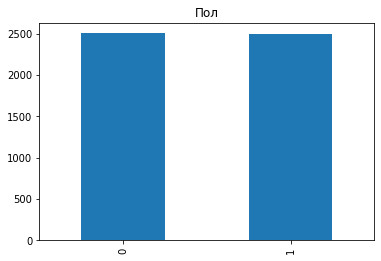

In [6]:
data['gender'].value_counts().plot(kind='bar', title='Пол');

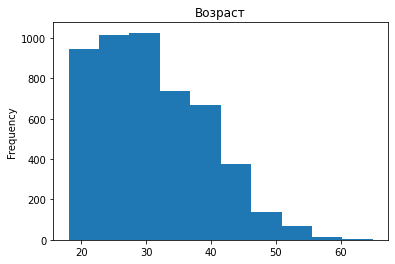

In [7]:
data['age'].plot(kind='hist', title='Возраст');

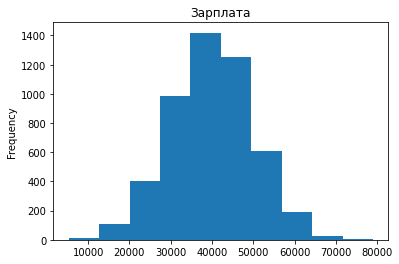

In [8]:
data['salary'].plot(kind='hist', title='Зарплата');

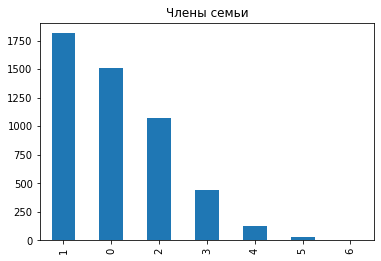

In [9]:
data['family_members'].value_counts().plot(kind='bar', title='Члены семьи');

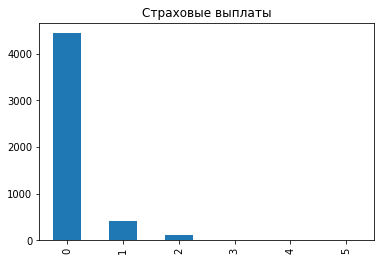

In [10]:
data['insurance_payouts'].value_counts().plot(kind='bar', title='Страховые выплаты');

## Умножение матриц

**Ответ:** Параметры линейной регрессии в исходной задаче и в преобразованной задаче связаны таким образом, что качество модели линейной регрессии не изменится.

**Обоснование:** Исходная модель линейной регрессии обучается на исходных признаках, тогда как преобразованная модель линейной регрессии обучается на преобразованных признаках (путем умножения на обратимую матрицу). Признаки умножаются на обратимую матрицу, поэтому связь между признаками и целевой переменной остается линейной. 

Если мы рассмотрим связь параметров модели линейной регрессии, то при умножении признаков на обратимую матрицу, эти параметры также будут преобразованы. Но в то же время, при предсказании новых значений целевой переменной с использованием новых параметров модели и преобразованных признаков, связь между признаками и целевой переменной будет сохранена.

Поэтому, даже после преобразования данных, модель линейной регрессии снова может учиться и предсказывать целевую переменную с тем же качеством, что и до преобразования.

## Алгоритм преобразования

**Алгоритм**

Для начала мы делим наш датасет на обучающую и тестовую выборки. Затем мы должны создать модель линейной регрессии, обучить ее и получить предсказания. В качестве оценки модели будем использовать метрику R2-score. Затем необходимо сгенерировать обратимую матрицу. **Если матрица является обратимой, используем ее. Иначе - генерируем новую матрицу.** После создания обратимой матрицы нужно преобразовать исходные данные. Умножаем признаки на на обратимую матрицу. Затем мы обучаем модель линеной регрессии, но уже на преобразованных данных, получаем предсказания и сравниваем значения метрик с оригинальной моделью.

**Обоснование**

При умножении признаков на обратимую матрицу, мы выполняем линейное преобразование, которое не меняет линейную зависимость между признаками и целевой переменной. Параметры модели линейной регрессии в исходной задаче и в преобразованной связаны таким образом, что качество модели линейной регрессии остается неизменным. Несмотря на изменение значения параметров, измененная модель все равно будет способна сохранять связь между признаками и целевой переменной с тем же качеством, как и до преобразования.

## Проверка алгоритма

In [11]:
features = data.drop('insurance_payouts', axis=1)
target = data['insurance_payouts']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2)

**Модель линейной регрессии на исходных данных.**

In [12]:
model_original = LinearRegression()
model_original.fit(features_train, target_train)
predictions_original = model_original.predict(features_valid)
r2_original = r2_score(target_valid, predictions_original)

**Преобразование данных.**

In [13]:
matrix = np.random.rand(features_train.shape[1], features_train.shape[1])
inverse_matrix = np.linalg.inv(matrix)

if np.linalg.det(matrix) != 0:
    print("Матрица обратима.")
else:
    print("Матрица необратима.")

features_train_transformed = features_train.dot(inverse_matrix)
features_valid_transformed = features_valid.dot(inverse_matrix)

Матрица обратима.


**Модель линейной регрессии на преобразованных данных.**

In [14]:
model_transformed = LinearRegression()
model_transformed.fit(features_train_transformed, target_train)
predictions_transformed = model_transformed.predict(features_valid_transformed)
r2_transformed = r2_score(target_valid, predictions_transformed)

In [15]:
print("R2 исходной модели:", r2_original)
print("R2 преобразованной модели:", r2_transformed)

R2 исходной модели: 0.4055469573290009
R2 преобразованной модели: 0.40554695732909385


Что до преобразования, что после, метрика R2 одинакова.

## Вывод

В ходе работы были изучены предоставленные данные. Был изучен вопрос измнения качество линейной регресси в связи с умножением на обратную матрицу - качество модели не изменится. Был предложен алгоритм преобразования данных, после использования которого качество линейной регресси не поменялось. Итоговые метрики R2 на исходных данных и преобразованных одинаковые.